# Simple Speech Recognition
by Jianxi Li


## ReadMe
To start with this codes, you should install Python, Tensorflow, Keras, Librosa
if you are using Anaconda, you could follow these code to install on your computer:
First install the librosa API

#### conda install -c conda-forge librosa

And then we need to intall Tensorflow, if you are using macOS, you could follow the instruction of this website: https://www.tensorflow.org/install/install_mac
if you are using windows, you could follow these two code to choose which verison you would like to install. 

#### pip3 install --upgrade tensorflow
#### pip3 install --upgrade tensorflow-gpu

I strongly recommend you to run this training process on an computer with a GPU, becaus the speed training on GPU is much more faster than CPU.
If you have an Nvidia GPU, you could use CUDA to speed up.

### where to find the data? 
I have down load the data from https://www.tensorflow.org/versions/master/tutorials/audio_recognition,
and choose 10 of the folders seperated into train and validation file. you could make your own dataset by choosing different file, but you have to seperate them in to train and val.
Also you should put the same type of the speech in to the same file as the speech is.
such as 

-train

  -yes
  
     -yes1.wav
     -yes2.wav
     
  -no
  
    -no1.wav
    -no2.wav
    
    
-val

  -yes
  
     -yes3.wav
     -yes4.wav
     
  -no
  
    -no3.wav
    -no4.wav
    
    
Or you could just download the data I have uploded on https://www.kaggle.com/jianxili/asmallbatch/data

### if you have NVIDIA GPU stop at this part, otherwise you could ignore this 
Q: What is CUDA?

According to NVIDIA's explanation:
CUDA™ is a revolutionary parallel computing architecture from NVIDIA.
As an enabling hardware and software technology, CUDA makes it possible to use the many computing cores in a graphics processor to perform general-purpose mathematical calculations, achieving dramatic speedups in computing performance.
CUDA is being utilized for science and research applications in fields like medical imaging, financial modeling, and energy exploration. It is also helping to create a new generation of end-user consumer applications in areas such as video conversion for mobile devices and improved video quality on PCs.

Also, you need to install the latest version of CUDA Toolkit and cuDNN on https://developer.nvidia.com/cuda-downloads

### Installing Keras
#### sudo pip install keras

## Introduction
### After installing the APIs above, let me start introducing this research

In this portfolio, I will show the attribute of the speech and show the sounds by diferent chart, so you could viualize the sound and see their difference.And after exploratory data analysis, I will build a Convolutional Neural Network with the help of Keras and Tensorflow backend. Also during this research, I will use librosa API to dealing with the .wav sounds. If you do not have thess API, this code might have some problems running on your computer. 

I download the data from https://www.tensorflow.org/versions/master/tutorials/audio_recognition.
Since this data is too large for me to dealing with, I choose part of them to do the research.


# Exploratory Data Analysis

At first we will begin with data visualization and see the numebr and frequency of the data we are going to study with.

In [1]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
#import plotly.tools as tls
import pandas as pd
import librosa
import librosa.display

In [2]:
#First we loaded two different speech of the same word "STOP" 
#and begin to visualize their similarity and difference
file_path1 = 'smallbatch/train/stop/1b835b87_nohash_1.wav'
y,sr= librosa.load(file_path1)

### Let's check the original sampling rate
#### it's 22050hz

In [3]:
sr

22050

In [4]:
file_path11 = 'smallbatch/train/stop/1b835b87_nohash_1.wav'
y11,sr11= librosa.load(file_path1,sr=8000)

In [5]:
sr11

8000

in the above code, I load the same .wave file with different sample rate;
y---loaded with the original sample rate 22050
y11--loaded with sample rate at 8000Hz
#### The reason why I choose 8000
According to the definition of voice frequency at https://en.wikipedia.org/wiki/Voice_frequency ,the frequency band with human voice is between approximately 300 Hz to 3400 Hz, and accodring to Nyquist–Shannon sampling theorem, the minimum sampling rate is as twice as the highgest frequency. So it's safe to keep the sampleing rate at 8000Hz.

In [6]:
file_path2 = 'smallbatch/train/stop/3ca784ec_nohash_1.wav'
y1,sr1= librosa.load(file_path2,sr=8000)

### Here is the wave of the two .wav file
#### we could find out that although it's the same word but their wave forms are different,
#### besides the speech may begin at different time with different speed and amplitude

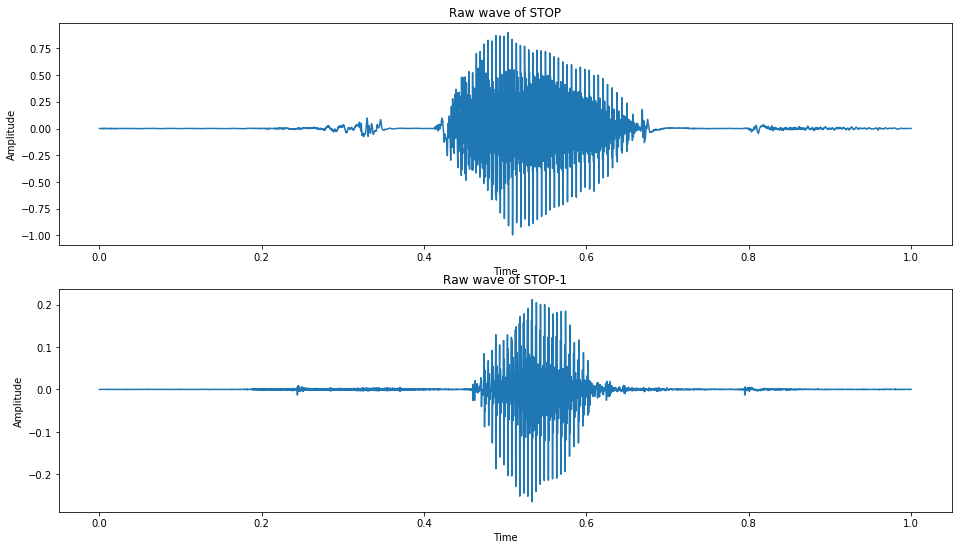

In [7]:
#
fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of STOP')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time')
ax1.plot(np.linspace(0, sr1/len(y1), sr1), y1)
ax2 = fig.add_subplot(212)
ax2.set_title('Raw wave of STOP-1')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.plot(np.linspace(0, sr/len(y), sr), y)
plt.show()

### Besides doing research on the amplititude of the .wav file, the frequency of the speech is also an important part
#### because when we consider with frequency, it means that now their are 3 attribute of the sounds: time, amplitutude and frequency; so let see the frequency change of 'STOP'

In [8]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

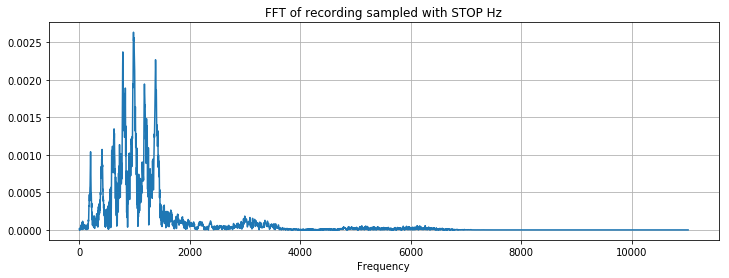

In [9]:
xf, vals = custom_fft(y, sr)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording sampled with ' + 'STOP' + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

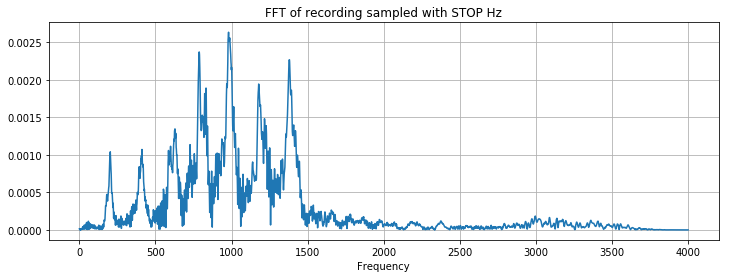

In [10]:
xf, vals = custom_fft(y11, sr11)
plt.figure(figsize=(12, 4))
plt.title('FFT of recording sampled with ' + 'STOP' + ' Hz')
plt.plot(xf, vals)
plt.xlabel('Frequency')
plt.grid()
plt.show()

#### As you can see, there are the same speech with different sampling rate.
We could find that if we use the 8Khz sampling rate, the frequency which contains the human speech is still not changed, so maybe it could help us to focus on the sound made by human.

So we will continue our study with the sampling rate at 8000Hz.

### What it using spectrum to vusualize the .wav file?

In [11]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)

In [12]:
 # Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

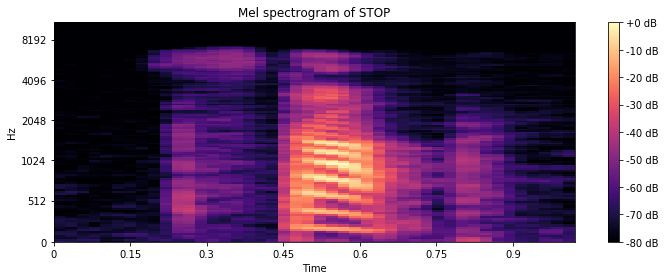

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram of STOP')
plt.tight_layout()
plt.show()

In [14]:
D1 = np.abs(librosa.stft(y1))**2
S1 = librosa.feature.melspectrogram(S=D1)

In [15]:
 # Passing through arguments to the Mel filters
S1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=256)

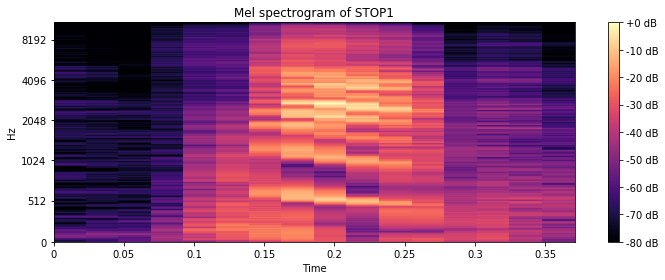

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S1,ref=np.max),y_axis='mel',x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram of STOP1')
plt.tight_layout()
plt.show()

### compare with the time-serial wave, using spectrogram can describe the more precisely;
According some of the research, the mel-spectrogram can describe of feature which is seneitive to the human hearing, so we decide to use mel-spectrogram to do out speech research.

# Now begin to set up the training model

#### this code runs on windows 10 OS with GTX1060, if you are using macbook, it will take a lot of time to train the model
At the very beginning, we could see how many files in the folders

In [17]:
import numpy as np
from keras import backend as K
from keras.preprocessing.image import Iterator
from keras.preprocessing.image import img_to_array

import librosa
import os
import multiprocessing.pool
from functools import partial
from random import getrandbits

train_path='smallbatch/train'
val_path ='smallbatch/val'


#to count how many files inside each class
classnames=os.listdir(train_path)
train_count_dict = {}
for d in classnames:
    train_count_dict[d] = len(os.listdir(os.path.join(train_path, d)))
print('train freq')
for k, v in train_count_dict.items():
    print ( '%7s  %i' % (k, v))
val_count_dict = {}
for d in classnames:
    val_count_dict[d] = len(os.listdir(os.path.join(val_path, d)))
print('\nval freq')
for k, v in val_count_dict.items():
    print ( '%7s  %i' % (k, v))
print ('')
#print ('test files', len(os.listdir(test_path+'/audio')))

C:\Users\Brooks\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


train freq
   down  1906
     go  1917
   left  1900
     no  1914
    off  1883
     on  1906
  right  1894
silence  341
   stop  1919
unknown  2196
     up  1903
    yes  1906

val freq
   down  453
     go  455
   left  453
     no  461
    off  474
     on  461
  right  473
silence  57
   stop  461
unknown  670
     up  472
    yes  471



#### Convert the sound to melspectrogram#
We use function spect_loader extracted from 
(https://github.com/adiyoss/GCommandsPytorch/blob/master/gcommand_loader.py)
to calculate the spectrogram of the audio file;
And the code 'class SpeechDirectoryIterator(Iterator):' is implemented with 

However we decide to use melspectrogram instead of spectrogram since some research 
found that while using MFCC, the performance will better;
So we use a similar chart to MFCC which is mel-spectrogram

In [18]:
def spect_loader(path, window_size, window_stride, window, normalize, max_len=101, 
                 augment=False, allow_speedandpitch=False, allow_pitch=False,
                 allow_speed=False, allow_dyn=False, allow_noise=False,
                allow_timeshift=False ):
    y, sr = librosa.load(path, sr=None)
    #OriginalSampelRate=16Khz;
    # n_fft = 4096
    #Here we still use the original sampling rate because after testing with sampling rate
    #8000,the accuracy is not as good as using the og sampling rate.
    n_fft = int(sr * window_size)
    win_length = n_fft
    hop_length = int(sr * window_stride)
    
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr,  n_fft = 4096,hop_length=hop_length,n_mels=128)

    # Convert to log scale (dB). We'll use the peak power as reference.
    log_S = librosa.core.amplitude_to_db(S, ref=np.max)

    
    #made a melspectrogram
    spect=log_S
    
    # make all spects with the same dimentions
    #In case of the mel-spectrogram size different since the lenght of the sound variate
    if spect.shape[1] < max_len:
        pad = np.zeros((spect.shape[0], max_len - spect.shape[1]))
        spect = np.hstack((spect, pad))
    elif spect.shape[1] > max_len:
        spect = spect[:max_len, ]
    spect = np.resize(spect, (1, spect.shape[0], spect.shape[1]))
    #spect = torch.FloatTensor(spect)
    
    
    # z-score normalization
    #calculate the mean and standard of the melspect
    if normalize:
        mean = np.mean(np.ravel(spect))
        std = np.std(np.ravel(spect))
        if std != 0:
            spect = spect -mean
            spect = spect / std
    return spect

In [19]:
def _count_valid_files_in_directory(directory, white_list_formats, follow_links):
    """Count files with extension in `white_list_formats` contained in a directory.
    # Arguments
        directory: absolute path to the directory containing files to be counted
        white_list_formats: set of strings containing allowed extensions for
            the files to be counted.
    # Returns
        the count of files with extension in `white_list_formats` contained in
        the directory.
    """
    def _recursive_list(subpath):
        return sorted(os.walk(subpath, followlinks=follow_links), key=lambda tpl: tpl[0])

    samples = 0
    for root, _, files in _recursive_list(directory):
        for fname in files:
            is_valid = False
            for extension in white_list_formats:
                if fname.lower().endswith('.' + extension):
                    is_valid = True
                    break
            if is_valid:
                samples += 1
    return samples

In [20]:
def _list_valid_filenames_in_directory(directory, white_list_formats,
                                       class_indices, follow_links):
    """List paths of files in `subdir` relative from `directory` whose extensions are in `white_list_formats`.
    # Arguments
        directory: absolute path to a directory containing the files to list.
            The directory name is used as class label and must be a key of `class_indices`.
        white_list_formats: set of strings containing allowed extensions for
            the files to be counted.
        class_indices: dictionary mapping a class name to its index.
    # Returns
        classes: a list of class indices
        filenames: the path of valid files in `directory`, relative from
            `directory`'s parent (e.g., if `directory` is "dataset/class1",
            the filenames will be ["class1/file1.jpg", "class1/file2.jpg", ...]).
    """
    def _recursive_list(subpath):
        return sorted(os.walk(subpath, followlinks=follow_links), key=lambda tpl: tpl[0])

    classes = []
    filenames = []
    subdir = os.path.basename(directory)
    basedir = os.path.dirname(directory)
    for root, _, files in _recursive_list(directory):
        for fname in sorted(files):
            is_valid = False
            for extension in white_list_formats:
                if fname.lower().endswith('.' + extension):
                    is_valid = True
                    break
            if is_valid:
                classes.append(class_indices[subdir])
                # add filename relative to directory
                absolute_path = os.path.join(root, fname)
                filenames.append(os.path.relpath(absolute_path, basedir))
    return classes, filenames

In [21]:
class SpeechDirectoryIterator(Iterator):
    """Iterator capable of reading images from a directory on disk.
    # Arguments
       
    """

    def __init__(self, directory, window_size, window_stride, 
                 window_type, normalize, max_len=101,
                 target_size=(256, 256), color_mode='grayscale',
                 classes=None, class_mode='categorical',
                 batch_size=32, shuffle=True, seed=None,
                 data_format=None, save_to_dir=None,
                 save_prefix='', save_format='png',
                 follow_links=False, interpolation='nearest', augment=False,
                allow_speedandpitch = False, allow_pitch = False,
                allow_speed = False, allow_dyn = False, allow_noise = False, allow_timeshift=False ):
        if data_format is None:
            data_format = K.image_data_format()
        self.window_size = window_size
        self.window_stride = window_stride
        self.window_type = window_type
        self.normalize = normalize
        self.max_len = max_len
        self.directory = directory
        self.allow_speedandpitch = allow_speedandpitch
        self.allow_pitch = allow_pitch
        self.allow_speed = allow_speed 
        self.allow_dyn = allow_dyn
        self.allow_noise = allow_noise
        self.allow_timeshift = allow_timeshift 
        self.augment = augment
#        self.image_data_generator = image_data_generator
        self.target_size = tuple(target_size)
        if color_mode not in {'rgb', 'grayscale'}:
            raise ValueError('Invalid color mode:', color_mode,
                             '; expected "rgb" or "grayscale".')
        self.color_mode = color_mode
        self.data_format = data_format
        if self.color_mode == 'rgb':
            #becasue it is rgb, so the hight of the data is 3
            if self.data_format == 'channels_last':
                self.image_shape = self.target_size + (3,)
            else:
                self.image_shape = (3,) + self.target_size
        else:
            #if it's gray scale, the picture's hight is 1
            if self.data_format == 'channels_last':
                self.image_shape = self.target_size + (1,)
            else:
                self.image_shape = (1,) + self.target_size
        self.classes = classes
        if class_mode not in {'categorical', 'binary', 'sparse',
                              'input', None}:
            raise ValueError('Invalid class_mode:', class_mode,
                             '; expected one of "categorical", '
                             '"binary", "sparse", "input"'
                             ' or None.')
        self.class_mode = class_mode
        self.save_to_dir = save_to_dir
        self.save_prefix = save_prefix
        self.save_format = save_format
        self.interpolation = interpolation

        white_list_formats = {'png', 'jpg', 'jpeg', 'bmp', 'ppm', 'wav'}

        # first, count the number of samples and classes
        self.samples = 0

        if not classes:
            classes = []
            for subdir in sorted(os.listdir(directory)):
                if os.path.isdir(os.path.join(directory, subdir)):
                    classes.append(subdir)
        self.num_classes = len(classes)
        self.class_indices = dict(zip(classes, range(len(classes))))

        pool = multiprocessing.pool.ThreadPool()
        function_partial = partial(_count_valid_files_in_directory,
                                   white_list_formats=white_list_formats,
                                   follow_links=follow_links)
        self.samples = sum(pool.map(function_partial,
                                    (os.path.join(directory, subdir)
                                     for subdir in classes)))

        print('Found %d images belonging to %d classes.' % (self.samples, self.num_classes))

        # second, build an index of the images in the different class subfolders
        results = []

        self.filenames = []
        self.classes = np.zeros((self.samples,), dtype='int32')
        i = 0
        for dirpath in (os.path.join(directory, subdir) for subdir in classes):
            results.append(pool.apply_async(_list_valid_filenames_in_directory,
                                            (dirpath, white_list_formats,
                                             self.class_indices, follow_links)))
            
        
        for res in results:
            classes, filenames = res.get()
            self.classes[i:i + len(classes)] = classes
            self.filenames += filenames
            if i==0:
                #Use the specloader to trans the .wav file to image
                img = spect_loader(os.path.join(self.directory, filenames[0]), 
                               self.window_size, 
                               self.window_stride, 
                               self.window_type, 
                               self.normalize, 
                               self.max_len, 
                               self.augment,
                               self.allow_speedandpitch,
                               self.allow_pitch,
                               self.allow_speed, 
                               self.allow_dyn,
                               self.allow_noise,
                               self.allow_timeshift ) 
                img=np.swapaxes(img, 0, 2)
                self.target_size = tuple((img.shape[0], img.shape[1]))
                print(self.target_size)
                if self.color_mode == 'rgb':
                    if self.data_format == 'channels_last':
                        self.image_shape = self.target_size + (3,)
                    else:
                        self.image_shape = (3,) + self.target_size
                else:
                    if self.data_format == 'channels_last':
                        self.image_shape = self.target_size + (1,)
                    else:
                        self.image_shape = (1,) + self.target_size
                        
            i += len(classes)
        pool.close()
        pool.join()
        super(SpeechDirectoryIterator, self).__init__(self.samples, batch_size, shuffle, seed)
    

    
    
    def _get_batches_of_transformed_samples(self, index_array):
        batch_x = np.zeros((len(index_array),) + self.image_shape, dtype=K.floatx())
        batch_f = []
        grayscale = self.color_mode == 'grayscale'
        # build batch of image data
        #print(index_array)
        for i, j in enumerate(index_array):
            #print(i, j, self.filenames[j])
            fname = self.filenames[j]
            #img = load_img(os.path.join(self.directory, fname),
            #               grayscale=grayscale,
            #               target_size=self.target_size,
            #               interpolation=self.interpolation)
            img = spect_loader(os.path.join(self.directory, fname), 
                               self.window_size, 
                               self.window_stride, 
                               self.window_type, 
                               self.normalize, 
                               self.max_len, 
                                )
            img=np.swapaxes(img, 0, 2)
            
            x = img_to_array(img, data_format=self.data_format)
            #x = self.image_data_generator.random_transform(x)
            #x = self.image_data_generator.standardize(x)
            batch_x[i] = x
            batch_f.append(fname)
        # optionally save augmented images to disk for debugging purposes
        if self.save_to_dir:
            for i, j in enumerate(index_array):
                img = array_to_img(batch_x[i], self.data_format, scale=True)
                fname = '{prefix}_{index}_{hash}.{format}'.format(prefix=self.save_prefix,
                                                                  index=j,
                                                                  hash=np.random.randint(1e7),
                                                                  format=self.save_format)
                img.save(os.path.join(self.save_to_dir, fname))
        # build batch of labels
        if self.class_mode == 'input':
            batch_y = batch_x.copy()
        elif self.class_mode == 'sparse':
            batch_y = self.classes[index_array]
        elif self.class_mode == 'binary':
            batch_y = self.classes[index_array].astype(K.floatx())
        elif self.class_mode == 'categorical':
            batch_y = np.zeros((len(batch_x), self.num_classes), dtype=K.floatx())
            for i, label in enumerate(self.classes[index_array]):
                batch_y[i, label] = 1.
        else:
            return batch_x
        return batch_x, batch_y

    def next(self):
        with self.lock:
            index_array = next(self.index_generator)[0]
        # The transformation of images is not under thread lock
        # so it can be done in parallel
        return self._get_batches_of_transformed_samples(index_array)

In [22]:
window_size=.02
window_stride=.01
window_type='hamming'
normalize=True
max_len=101
batch_size = 64
#put the train file to train_iterator
train_iterator = SpeechDirectoryIterator(directory=train_path, 
                                   batch_size=batch_size, 
                                   window_size=window_size, 
                                   window_stride=window_stride, 
                                   window_type=window_type,
                                   normalize=normalize, 
                                   max_len=max_len)

Found 21585 images belonging to 12 classes.
(101, 128)


In [23]:
#put the validation file to val_iterator
val_iterator = SpeechDirectoryIterator(directory=val_path, 
                                   batch_size=batch_size, 
                                   window_size=window_size, 
                                   window_stride=window_stride, 
                                   window_type=window_type,
                                   normalize=normalize, 
                                   max_len=max_len)

Found 5361 images belonging to 12 classes.
(101, 128)


## Set up your model by Keras
Keras is the most efficient tool I have ever met to set up Neural Network.

You could find the instructions on https://keras.io;

### build the CNN model
As we have converted the .wav file into mel-spectrogram, the question of recognizing speech has become the question of classifying the mel-spectrograms;

I build my model base on LeNet created by Prof. Yann LeCun, it's a efficient CNN and models is simple. 

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
#build the training model by keras

#Use model structure similar to the MNIST recognition
#And we have made some optimize of the parameters include the costfunc and optimizer ect.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=train_iterator.image_shape))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.5))
#flat all the pixel
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(len(classnames), activation = 'softmax')) #Last layer with one output per class
#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss='categorical_crossentropy', optimizer='Adadelta',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 99, 126, 32)       320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 124, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 62, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 190464)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               24379520  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

You could see the detail parameter on the summary

### You could use some functions to automatically change the Learning Rate and stop when the loss do not contibue with a certain steps;

for example, you could use EarlyStopping, ReduceLROnPlateau from Keras API

In [25]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#Use this func to early stop when the val_loss do not lower
#Use this ReduceLROnPlateau to auto adapt the LearningRate
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='auto', min_lr=0.00001)
model.fit_generator(train_iterator,
        steps_per_epoch=int(np.ceil(train_iterator.n / batch_size)),
        epochs=20,
        validation_data=val_iterator,
        validation_steps=int(np.ceil(val_iterator.n / batch_size)),
        verbose=1, callbacks=[early, reduce])

Epoch 1/20
338/338 [==============================] - 499s 1s/step - loss: 1.9517 - acc: 0.3260 - val_loss: 1.4568 - val_acc: 0.5271
Epoch 2/20
338/338 [==============================] - 399s 1s/step - loss: 1.3789 - acc: 0.5224 - val_loss: 1.1444 - val_acc: 0.6439
Epoch 3/20
338/338 [==============================] - 400s 1s/step - loss: 1.0848 - acc: 0.6279 - val_loss: 0.9838 - val_acc: 0.7045
Epoch 4/20
338/338 [==============================] - 399s 1s/step - loss: 0.9053 - acc: 0.6853 - val_loss: 0.9431 - val_acc: 0.7133
Epoch 5/20
338/338 [==============================] - 400s 1s/step - loss: 0.7791 - acc: 0.7257 - val_loss: 0.8984 - val_acc: 0.7288
Epoch 6/20
338/338 [==============================] - 399s 1s/step - loss: 0.6795 - acc: 0.7631 - val_loss: 0.8727 - val_acc: 0.7299
Epoch 7/20
338/338 [==============================] - 399s 1s/step - loss: 0.6014 - acc: 0.7909 - val_loss: 0.9487 - val_acc: 0.7183
Epoch 8/20
338/338 [==============================] - 402s 1s/step - 

## Here is my result of this research 

After training with 11 epoches, the training accuracy rate is 87.25%, and the validation accuracy rate is 75.69%;

#### How about training with sample rate at 8000 Hz?
I have also tried to train in 8000Hz, and the result is the validation accuracy is 73.16%;
which is similar to the sampling rate of the 


Epoch 15/20
338/338 [==============================] - 772s 2s/step - loss: 0.5143 - acc: 0.8206 - val_loss: 0.9433 - val_acc: 0.7316
Epoch 00015: early stopping

#### conclusion

In the previous EDA, I have tried to use a lower Sample Rate to reduce the size of the input data. And then when I apply it to training.
After training with different samplerate, I found that when lower the sample rate to 8000Hz, the rate of accuracy do not lower too much, it just 2.53% lower than the original sample rate. 
So we can make a conclusion that the speech frequency of human did seperated lower than 4000 Hz.


### MIT License

Copyright (c) 2018 J.L

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
